# Carbon Budget

SOURCES:
- IPCC (2023) AR6 https://www.ipcc.ch/report/ar6/syr/summary-for-policymakers/
- Friedlingstein, P., O'Sullivan et al.: Global Carbon Budget 2025, Earth Syst. Sci. Data Discuss. [preprint], https://doi.org/10.5194/essd-2025-659, in review, 2025.

DATA:
- Global Carbon Project. (2025). Supplemental data of Global Carbon Budget 2025 (Version 1.0) [2025 Global Budget 2025 v0.3]. Global Carbon Project. https://doi.org/10.18160/gcp-2025 
- https://www.icos-cp.eu/science-and-impact/global-carbon-budget/2025

Color zones:
- Green: if 500GtCO2 split evenly throughout the 80 years, budget so far: 37.8 GtCO₂
- Yellow: double the green budget
- Red: everything above

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime
import matplotlib as mpl

mpl.rcParams['font.family'] = 'LCD'

# Load CO2 data
budget = pd.read_excel(r'data\Carbon_Budget.xlsx')

# Rename & drop columns
budget = budget.rename(columns={'Year': 'year', 'fossil emissions excluding carbonation': 'fossil', 'land-use change emissions': 'land', 'cement carbonation sink': 'sink'})
budget = budget.drop(columns={'atmospheric growth', 'ocean sink', 'land sink', 'budget imbalance'})

# Calculate budgets
years = [2020, 2021, 2022, 2023, 2024]
budget_20_24 = budget.loc[budget['year'].isin(years)].copy()
budget_20_24['budget'] = (
    budget_20_24['fossil']
    + budget_20_24['land']
    - budget_20_24['sink']
)
budget_20_24 = budget_20_24.sort_values('year').reset_index(drop=True)
budget_2025 = {
    'year': 2025,
    'fossil': np.nan,
    'land': np.nan,
    'sink': np.nan,
    'budget': 11.5
}
budget_total_df = pd.concat(
    [budget_20_24, pd.DataFrame([budget_2025])],
    ignore_index=True
)
total_budget = budget_total_df['budget'].sum()
total_budget_co2 = total_budget * 3.664
print(f'Total Budget in GtC:           {total_budget:.2f} GtC')
print(f'Total Budget in GtCo2:         {total_budget_co2:.2f} GtCo2')

# Carbon budget parameters
CARBON_BUDGET_START = 500  # GtCO2 from Jan 2020
BUDGET_START_DATE = datetime(2020, 1, 1)
budget_end_date = datetime(2100, 1, 1)

# Calculate time elapsed since budget start
current_date = datetime.now()
years_elapsed = (current_date - BUDGET_START_DATE).total_seconds() / (365.25 * 24 * 3600)

# Calculate emissions used
budget_remaining = CARBON_BUDGET_START - total_budget_co2

# Calculate percentages
pct_used = (total_budget_co2 / CARBON_BUDGET_START) * 100
pct_remaining = 100 - pct_used

# Calculate budget today
budget_time = 2100 - 2020
budget_per_year = CARBON_BUDGET_START / budget_time
current_budget = years_elapsed * budget_per_year

print(f"Starting budget (Jan 2020):    {CARBON_BUDGET_START} GtCO₂")
print(f"Timespan for Budget use:       {budget_time} years")
print(f"Years elapsed since 2020:      {years_elapsed:.2f} years")
print(f"Current budget limit:          {current_budget:.1f} GtCO₂")
print(f"Emissions used so far:         {total_budget_co2:.1f} GtCO₂")
print(f"Budget remaining:              {budget_remaining:.1f} GtCO₂")
print(f"Percentage used:               {pct_used:.1f}%")
print(f"Percentage remaining:          {pct_remaining:.1f}%")

Total Budget in GtC:           67.58 GtC
Total Budget in GtCo2:         247.60 GtCo2
Starting budget (Jan 2020):    500 GtCO₂
Timespan for Budget use:       80 years
Years elapsed since 2020:      6.05 years
Current budget limit:          37.8 GtCO₂
Emissions used so far:         247.6 GtCO₂
Budget remaining:              252.4 GtCO₂
Percentage used:               49.5%
Percentage remaining:          50.5%


In [2]:
colors = {'green': '#2dc937',
          'light_green': '#99c140',
          'yellow': '#e7b416',
          'orange': '#db7b2b',
          'red': '#cc3232',
          'gray': '#666666',
          'white': '#cccccc',
          'black': '#000000'
          }

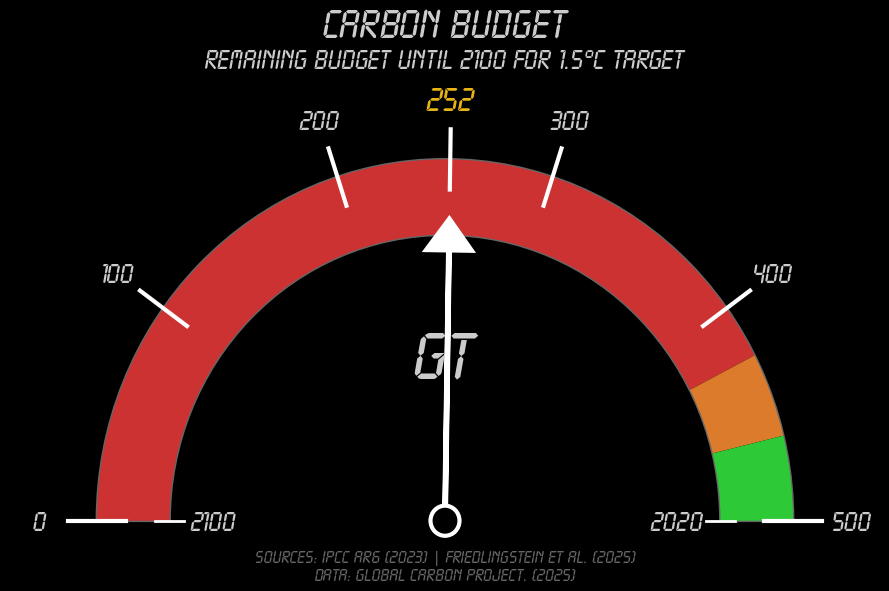

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6), facecolor=colors['black'])
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.1, 1.5)
ax.axis('off')
ax.set_facecolor(colors['black'])

# Half a circle
theta_start = 180  # Left side
theta_end = 0      # Right side

# Emission range
emission_min = 0
emission_max = 500
emission_range = emission_max - emission_min

# Calculate angles for emission
def emission_to_angle(emission):
        pct = (emission - emission_min) / emission_range
        return theta_start + pct * (theta_end - theta_start)

# Background arc
bg_arc = Wedge((0, 0), 1.2, theta_end, theta_start, width=0.25,
               facecolor=colors['black'], edgecolor=colors['gray'], linewidth=2)
ax.add_patch(bg_arc)

# Calculate needle angle
needle_angle = pct_used * 1.8  # Scale to 180 degrees

current_budget_angle = emission_to_angle(emission_max - current_budget)
double_budget_angle = emission_to_angle(emission_max - (current_budget*2))

# Used portion (red arc)
remaining_arc = Wedge((0, 0), 1.2, double_budget_angle, theta_start, width=0.25,
                      facecolor=colors['red'], edgecolor='none')
ax.add_patch(remaining_arc)

# Double the budget limit
middle_arc = Wedge((0, 0), 1.2, current_budget_angle, double_budget_angle, width=0.25,
                 facecolor=colors['orange'], edgecolor='none')
ax.add_patch(middle_arc)

# Remaining portion (green arc)
used_arc = Wedge((0, 0), 1.2, theta_end, current_budget_angle, width=0.25,
                 facecolor=colors['green'], edgecolor='none')
ax.add_patch(used_arc)

# Add tick marks and labels (outer ring)
tick_values = [500, 400, 300, 200, 100 ,0]
for em_val in tick_values:
        angle = emission_to_angle(em_val)
        angle_rad = np.radians(angle)
        
        # Tick mark outer ring
        x_outer = 1.3 * np.cos(angle_rad)
        y_outer = 1.3 * np.sin(angle_rad)
        x_inner = 1.1 * np.cos(angle_rad)
        y_inner = 1.1 * np.sin(angle_rad)
        ax.plot([x_inner, x_outer], [y_inner, y_outer], 
                color='white', linewidth=3)
        
        # Label outer ring
        x_label = 1.4 * np.cos(angle_rad)
        y_label = 1.4 * np.sin(angle_rad)
        label_text = f'{em_val}'
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=20, 
                color='#cccccc')

# inner ring
tick_values = [[500, 2020], [0, 2100]]
for em_val, year_val in tick_values: 
        angle = emission_to_angle(em_val)
        angle_rad = np.radians(angle)       
        # Tick mark inner ring
        x_outer = 1 * np.cos(angle_rad)
        y_outer = 1 * np.sin(angle_rad)
        x_inner = 0.9 * np.cos(angle_rad)
        y_inner = 0.9 * np.sin(angle_rad)
        ax.plot([x_inner, x_outer], [y_inner, y_outer], 
                color='white', linewidth=2)
        
        # Label inner ring
        x_label = 0.8 * np.cos(angle_rad)
        y_label = 0.8 * np.sin(angle_rad)
        label_text = f'{year_val}'
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=20, 
                color='#cccccc')

# Draw needle
needle_rad = np.radians(needle_angle)
needle_x = 0.9 * np.cos(needle_rad)
needle_y = 0.9 * np.sin(needle_rad)
ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='white', ec='white', linewidth=4, zorder=2)

# current budget
emissions_remaining = emission_max - total_budget_co2 
x_outer = 1.3 * np.cos(needle_rad)
y_outer = 1.3 * np.sin(needle_rad)
x_inner = 1.1 * np.cos(needle_rad)
y_inner = 1.1 * np.sin(needle_rad)
x_label = 1.4 * np.cos(needle_rad)
y_label = 1.4 * np.sin(needle_rad)
ax.plot(
        [x_inner, x_outer], [y_inner, y_outer],
        color='white', linewidth=3
    )
ax.text(
        x_label, y_label, f'{emissions_remaining:.0f}',
        ha='center', va='center',
        fontsize=25,
        color=colors['yellow'],
        fontweight='bold'
    )

# Center hub
center = Circle((0, 0), 0.05, facecolor=colors['black'], edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)

# Unit
ax.text(0, 0.55, 'Gt', fontsize=50,
        color=colors['white'], ha='center', va='center', fontweight='bold', zorder=1)

# Title
ax.text(0, 1.6, 'CARBON BUDGET', fontsize=30,
        fontweight='bold', color=colors['white'], ha='center', va='bottom')
ax.text(0, 1.5, 'Remaining Budget until 2100 for 1.5°C Target', fontsize=20,
        color=colors['white'], ha='center', va='bottom', style='italic')

# Source
ax.text(0, -0.1, '''Sources: IPCC AR6 (2023) | Friedlingstein et al. (2025)
Data: Global Carbon Project. (2025)''',
        fontsize=13, color=colors['gray'], ha='center', va='top')

plt.tight_layout()
plt.savefig('visualizations/carbon_budget.svg',
            bbox_inches='tight', facecolor=colors['black'], edgecolor='none')
plt.show()